# KPMG Virtual Experience Task 2

This notebook is for preparing and analysing the customer data provided by Sprocket Central Pty Ltd for analysing customer trends and thereby determining which of the new customers are likely to drive the most value for the company, so that marketing resources can be allocated accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
header_names = ['cust_id', 'fname', 'lname', 'gender', '3y_bike_purchases', 'DOB', 'job_title', 'job_industry',
               'wealth_segment', 'deceased', 'default', 'owns_car', 'tenure']

In [3]:
df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic",
                    header=None, skiprows=2, names=header_names)
df['DOB'] = pd.to_datetime(df['DOB'], yearfirst=True)
df.head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24364\2764472179.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic",


,cust_id,fname,lname,gender,3y_bike_purchases,DOB,job_title,job_industry,wealth_segment,deceased,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cust_id            4000 non-null   int64         
 1   fname              4000 non-null   object        
 2   lname              3875 non-null   object        
 3   gender             4000 non-null   object        
 4   3y_bike_purchases  4000 non-null   int64         
 5   DOB                3913 non-null   datetime64[ns]
 6   job_title          3494 non-null   object        
 7   job_industry       3344 non-null   object        
 8   wealth_segment     4000 non-null   object        
 9   deceased           4000 non-null   object        
 10  default            3698 non-null   object        
 11  owns_car           4000 non-null   object        
 12  tenure             3913 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory us

In [5]:
df.describe()

,cust_id,3y_bike_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


## Adding new columns from other sources

In [6]:
#Take state and zipcode from other sheet to add them as variables
df1 = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerAddress",
                    skiprows=1)

In [7]:
df1.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [8]:
#Adding new columns
df = df.merge(df1, left_on='cust_id', right_on='customer_id', how='left')
#Another option but couldn't reassign
#df.join(df1.set_index('customer_id'), on='cust_id')
df.head()

,cust_id,fname,lname,gender,3y_bike_purchases,DOB,job_title,job_industry,wealth_segment,deceased,default,owns_car,tenure,customer_id,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,1.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,2.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,4.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,5.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [9]:
#Dropping unnecessary columns
df.drop(['customer_id', 'country'],axis=1, inplace=True)
df.head()

,cust_id,fname,lname,gender,3y_bike_purchases,DOB,job_title,job_industry,wealth_segment,deceased,default,owns_car,tenure,address,postcode,state,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,4.0


In [10]:
#Taking data from other sheet transactions
df2 = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="Transactions",
                    skiprows=1)
df2.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [11]:
df2 = df2[df2['order_status'] == 'Approved']

In [12]:
#Function to find total cost or spending for each customer
def cust_cost(x):
    total_cost = df2[df2['customer_id'] == x]['standard_cost'].sum()
    return total_cost

In [13]:
df2['cust_profit'] = df2['customer_id'].apply(cust_cost)
df2.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,cust_profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,1307.16
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,3172.59
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,3182.79
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,3555.84
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,4646.54


In [14]:
df3 = df2[['customer_id', 'cust_profit']]
df3

,customer_id,cust_profit
0,2950,1307.16
1,3120,3172.59
2,402,3182.79
3,3135,3555.84
4,787,4646.54
...,...,...
19995,1018,3667.08
19996,127,5955.91
19997,2284,2821.27
19998,2764,1045.52


In [15]:
df3 = df3.drop_duplicates()
df3

,customer_id,cust_profit
0,2950,1307.16
1,3120,3172.59
2,402,3182.79
3,3135,3555.84
4,787,4646.54
...,...,...
17595,1569,363.25
17668,130,1560.84
17782,2200,279.69
17965,2789,1548.64


In [16]:
#Adding
df = df.merge(df3, left_on='cust_id', right_on='customer_id', how='left')
df.head()

,cust_id,fname,lname,gender,3y_bike_purchases,DOB,job_title,job_industry,wealth_segment,deceased,default,owns_car,tenure,address,postcode,state,property_valuation,customer_id,cust_profit
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,1.0,6066.36
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,10.0,2.0,1922.81
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,3.0,6525.42
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,9.0,4.0,827.15
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,4.0,5.0,3508.26


In [17]:
#Drop unnecessary columns
df.drop(['customer_id', 'default'],axis=1, inplace=True)
df.head()

,cust_id,fname,lname,gender,3y_bike_purchases,DOB,job_title,job_industry,wealth_segment,deceased,owns_car,tenure,address,postcode,state,property_valuation,cust_profit
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,6066.36
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,10.0,1922.81
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,6525.42
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,9.0,827.15
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,4.0,3508.26


| Type | Variables |
| ---- | --------- |
| **Categorical variables** | gender, job_industry, wealth_segment, deceased, owns_car, state |
| **Continuous variables (numeric)** | cust_id, 3y_bike_purchases, DOB, tenure, postcode, property valuation, cust_profit |
| **Continuous variables (text)** | fname, lname, job_title, address |

## Data Cleaning

In [18]:
#Searching for duplicates
df.duplicated().any()

False

In [19]:
#Count of missing values
df.isnull().sum()

cust_id                 0
fname                   0
lname                 125
gender                  0
3y_bike_purchases       0
DOB                    87
job_title             506
job_industry          656
wealth_segment          0
deceased                0
owns_car                0
tenure                 87
address                 4
postcode                4
state                   4
property_valuation      4
cust_profit           508
dtype: int64

In [20]:
#Percentage of missing values
null_count = df.isnull().sum()
(null_count / len(df)) * 100

cust_id                0.000
fname                  0.000
lname                  3.125
gender                 0.000
3y_bike_purchases      0.000
DOB                    2.175
job_title             12.650
job_industry          16.400
wealth_segment         0.000
deceased               0.000
owns_car               0.000
tenure                 2.175
address                0.100
postcode               0.100
state                  0.100
property_valuation     0.100
cust_profit           12.700
dtype: float64

As % of missing values are all less than 20%, we are not deleting them 

In [21]:
#Fixing any inconsistent category names
df['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [22]:
df.replace('Femal', 'Female', inplace=True)
df.replace('F', 'Female', inplace=True)
df.replace('M', 'Male', inplace=True)
df['gender'].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [23]:
df['state'].value_counts()

NSW                2052
VIC                 939
QLD                 837
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [24]:
#Fixing inconsistent categories
df.replace('New South Wales', 'NSW', inplace=True)
df.replace('Victoria', 'VIC', inplace=True)
df['state'].value_counts()

NSW    2138
VIC    1021
QLD     837
Name: state, dtype: int64

In [25]:
df['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [26]:
df['job_industry'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry, dtype: int64

In [27]:
#Removing outliers
#Outliers in deceased
df['deceased'].value_counts()

N    3998
Y       2
Name: deceased, dtype: int64

As there are only 2 deceased people out 4000, we delete them and remove the redundant column

In [28]:
df = df[df['deceased'] == 'N']
df['deceased'].value_counts()

N    3998
Name: deceased, dtype: int64

In [29]:
df.drop(['deceased'], axis=1, inplace=True)

In [30]:
df.head()

,cust_id,fname,lname,gender,3y_bike_purchases,DOB,job_title,job_industry,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,cust_profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,060 Morning Avenue,2016.0,NSW,10.0,6066.36
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,6 Meadow Vale Court,2153.0,NSW,10.0,1922.81
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0,NaN,NaN,NaN,NaN,6525.42
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,No,7.0,0 Holy Cross Court,4211.0,QLD,9.0,827.15
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,Yes,8.0,17979 Del Mar Point,2448.0,NSW,4.0,3508.26


In [31]:
#Outliers in DOB
df[df['DOB'] < '1930-01-01']

,cust_id,fname,lname,gender,3y_bike_purchases,DOB,job_title,job_industry,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,cust_profit
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0,833 Luster Way,4005.0,QLD,8.0,7273.24


In [32]:
df = df[df['DOB'] != '1843-12-21']

In [33]:
df[df['DOB'] > '2005-01-01']

,cust_id,fname,lname,gender,3y_bike_purchases,DOB,job_title,job_industry,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,cust_profit


## Data Exploration- Understanding Data Distributions

In [34]:
#Checking count across job titles
df['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

<Axes: xlabel='job_industry', ylabel='count'>

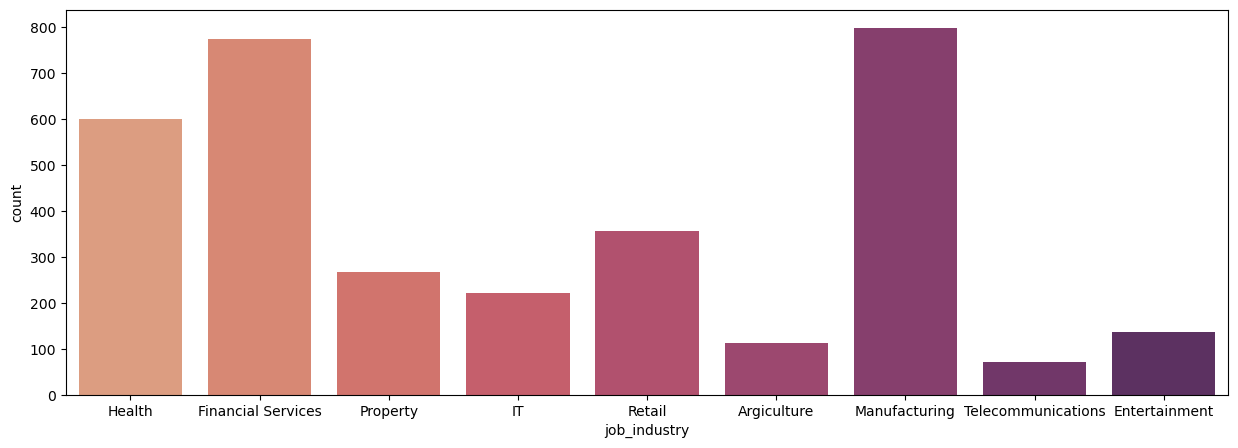

In [35]:
# Visualising distribution across industries
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x='job_industry', data=df, ax=ax, palette='flare')

Inference: Most customers are from Manufacturing, Financial services and Health sectors; least from Telecommunications, Agriculture and IT

<Axes: xlabel='job_industry', ylabel='cust_profit'>

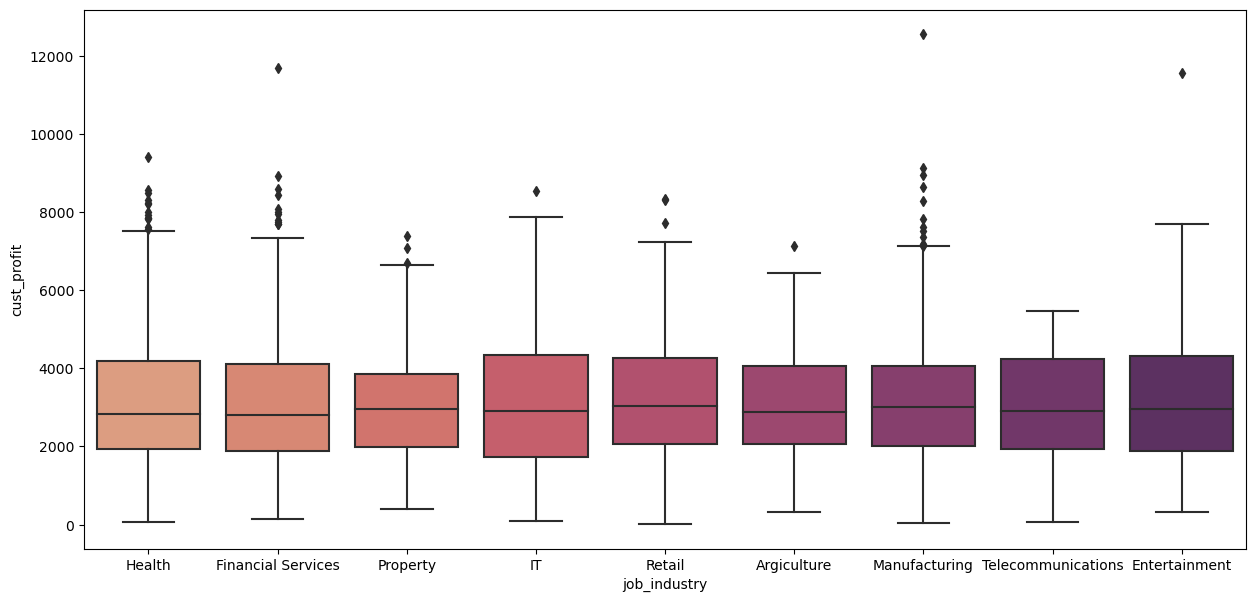

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x='job_industry', y='cust_profit', data=df, palette='flare')

Inference: Although most customers spend the same amount (2000 - 4000 USD) across all industries, the Health, Financial Services and Manufacturing sectors have some customers that spend very high amounts (>8000 USD), driving profitability. This, coupled with higher number of customers as seen in the plot above, makes these sectors valuable for business.

<Axes: xlabel='property_valuation', ylabel='cust_profit'>

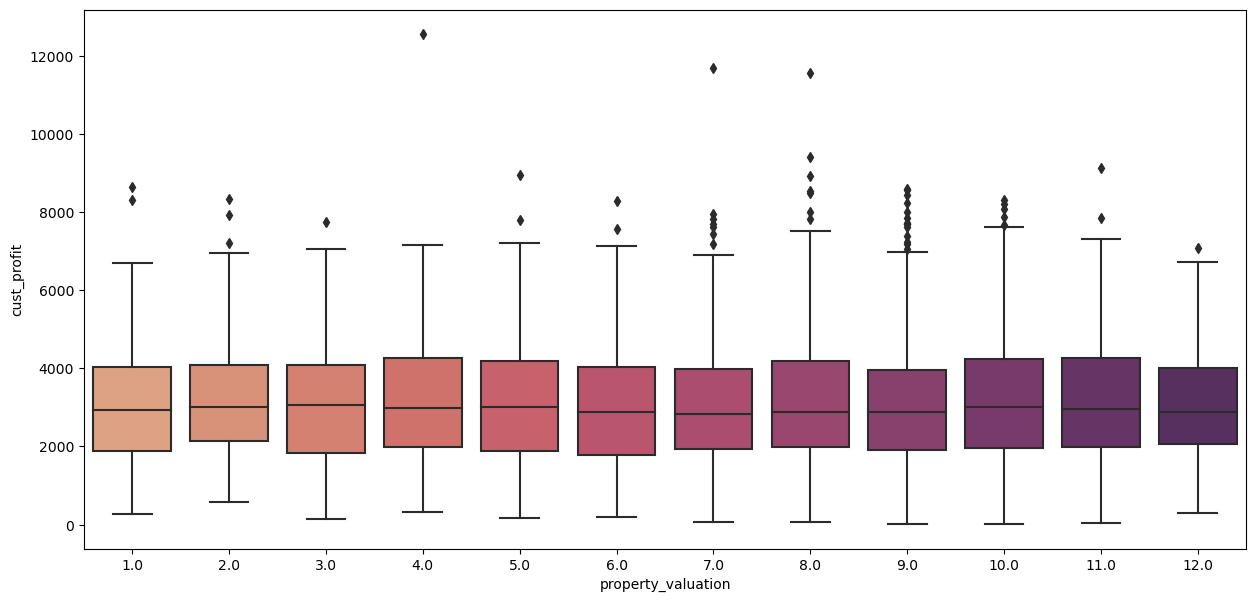

In [37]:
# 3y purchase and tenure
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x='property_valuation', y='cust_profit', data=df, palette='flare')

<Axes: xlabel='gender', ylabel='count'>

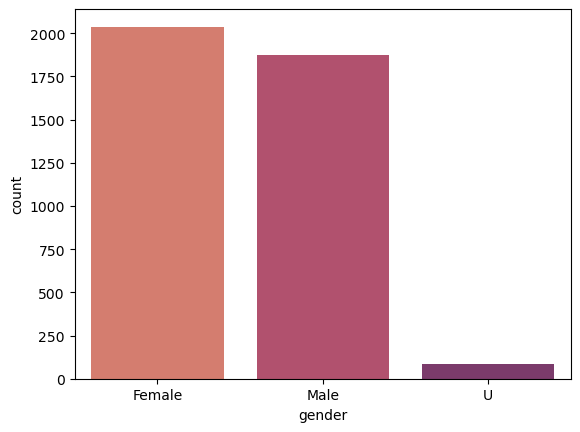

In [38]:
#Visualising distribution across gender
sns.countplot(x='gender', data=df, palette='flare')

Inference: Slightly more females than males, 'U' negligible

<Axes: xlabel='gender', ylabel='cust_profit'>

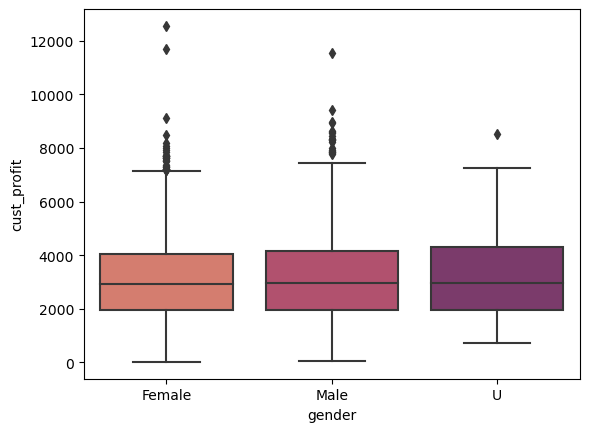

In [39]:
sns.boxplot(x='gender', y='cust_profit', data=df, palette='flare')

Inference: Males made slightly more purchases than females

<Axes: xlabel='wealth_segment', ylabel='count'>

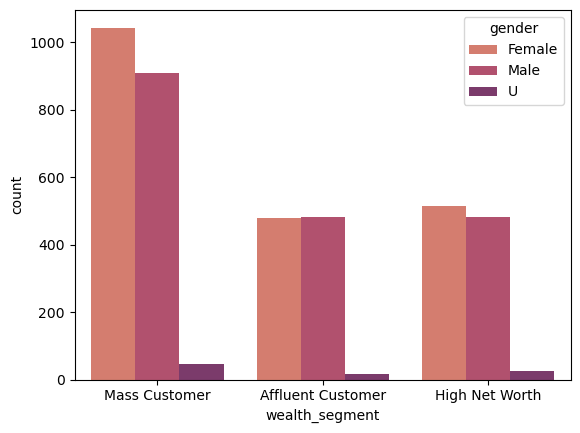

In [40]:
#Visualising distribution across wealth segments
sns.countplot(x='wealth_segment', data=df, hue='gender', palette='flare')

Inference: Most are mass customers, roughly same number of affluent and high net worth customers

<Axes: xlabel='state', ylabel='count'>

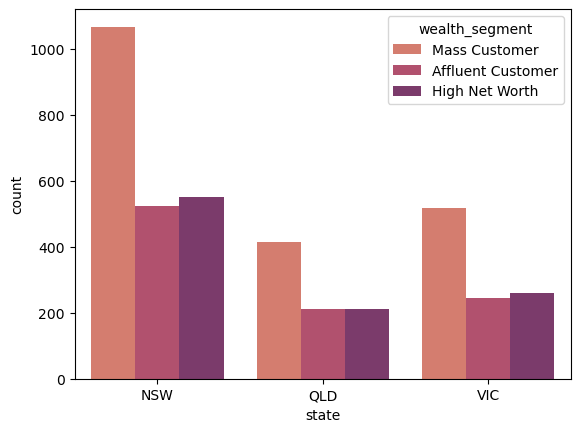

In [41]:
#Visualising across states
sns.countplot(x='state', data=df, hue='wealth_segment', palette='flare')

Inference: Most customers are from New South Wales, followed by Victoria and Queensland.

<Axes: xlabel='wealth_segment', ylabel='cust_profit'>

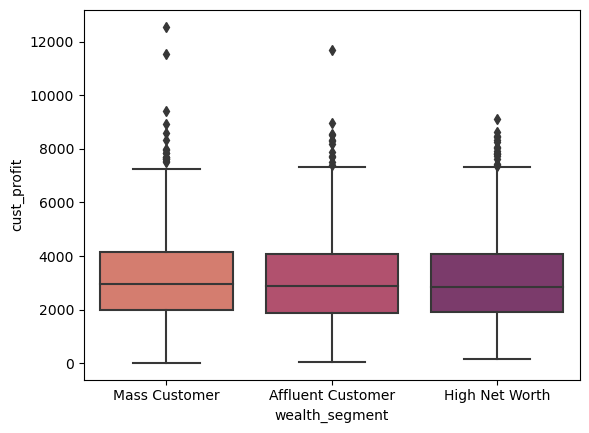

In [42]:
sns.boxplot(x='wealth_segment', y='cust_profit', data=df, palette='flare')

<Axes: xlabel='state', ylabel='cust_profit'>

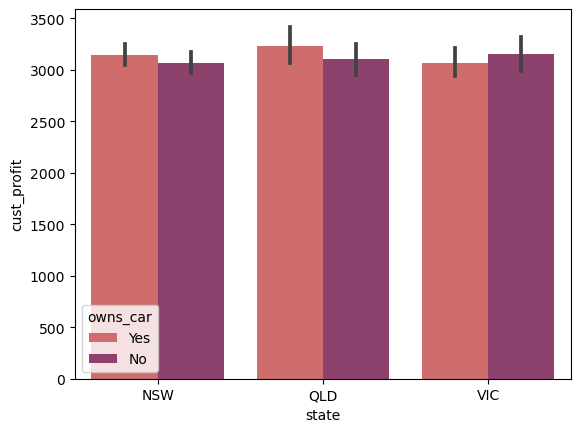

In [43]:
#Visualising distribution across car owners
sns.barplot(x='state', y='cust_profit', data=df, hue='owns_car', palette='flare')

Inference: Roughly equal numbers of car owners and non-car owners

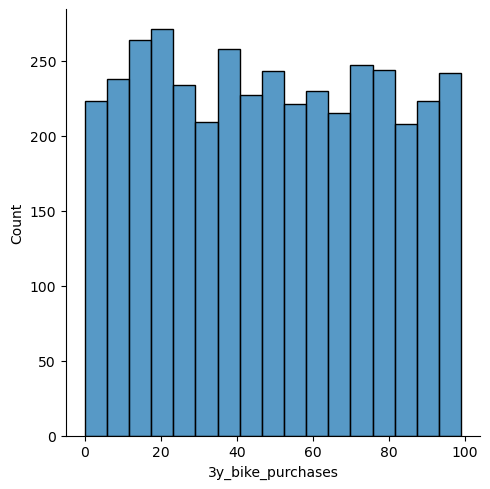

In [44]:
#Distribution across 3 year bike purchases
sns.displot(x='3y_bike_purchases', data=df)

Inference: High (>200) number of people across purchase quantities

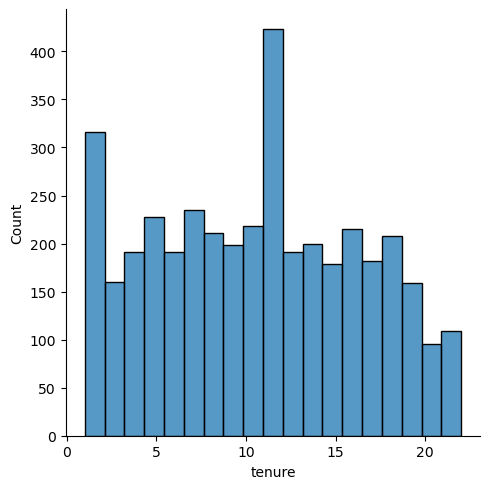

In [45]:
#Distribution across tenure
sns.displot(x='tenure', data=df)

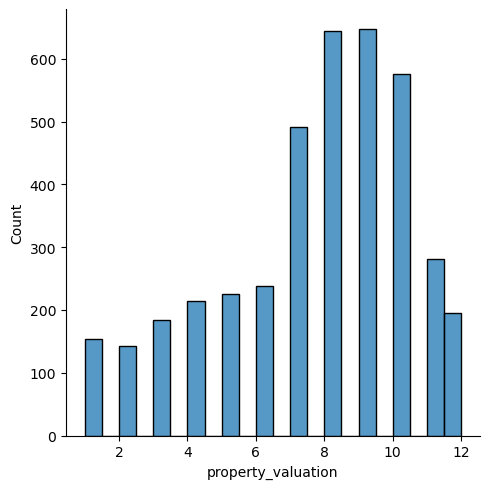

In [46]:
#Visualising across property valuations
sns.displot(x='property_valuation',data=df)

Inference: Most customers' houses have high property valuation (7-11)

<Axes: xlabel='state', ylabel='cust_profit'>

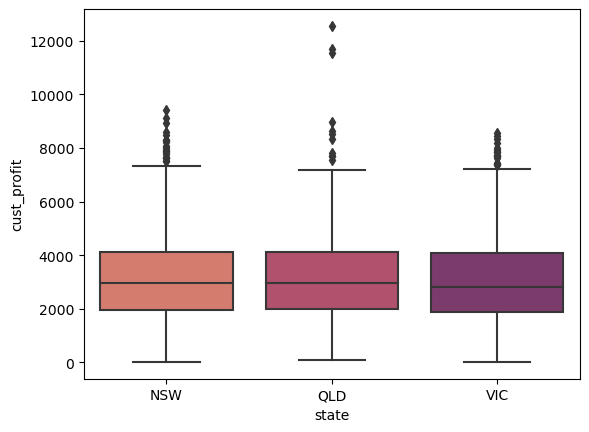

In [47]:
sns.boxplot(x='state', y='cust_profit', data=df, palette='flare')

## Data Transformation

First we shall perform one hot encoding and integer encoding for the categorical variables

In [48]:
#Integer encoding for binary features
df['owns_car'] = df['owns_car'].replace({'Yes':1, 'No':0})

In [49]:
df.head()

,cust_id,fname,lname,gender,3y_bike_purchases,DOB,job_title,job_industry,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,cust_profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,1,11.0,060 Morning Avenue,2016.0,NSW,10.0,6066.36
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,1,16.0,6 Meadow Vale Court,2153.0,NSW,10.0,1922.81
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,1,15.0,NaN,NaN,NaN,NaN,6525.42
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,0,7.0,0 Holy Cross Court,4211.0,QLD,9.0,827.15
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,1,8.0,17979 Del Mar Point,2448.0,NSW,4.0,3508.26


In [50]:
# Adding an age column
now = pd.Timestamp('now')
df['Age'] = (now - df['DOB']).astype('<m8[Y]') #or astype('timedelta64[Y]')

#Another method, for reference
#today = pd.to_datetime('today')
#df['Age'] = today.year - df['DOB'].dt.year

df['Age']

0       69.0
1       42.0
2       69.0
3       61.0
4       46.0
        ... 
3995    47.0
3996    22.0
3997     NaN
3998    49.0
3999    31.0
Name: Age, Length: 3997, dtype: float64

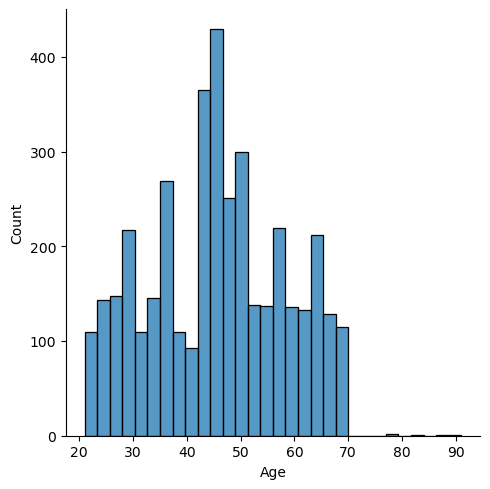

In [51]:
#Visualising distribution across ages
sns.displot(x='Age', data=df)

In [52]:
# Grouping into age brackets
bins= [0,10,20,30,40,50,60,70,80,90]
labels = ['Child','Teen','20s','30s','40s','50s','60s','70s','80s']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [53]:
df.head()

,cust_id,fname,lname,gender,3y_bike_purchases,DOB,job_title,job_industry,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,cust_profit,Age,AgeGroup
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,1,11.0,060 Morning Avenue,2016.0,NSW,10.0,6066.36,69.0,60s
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,1,16.0,6 Meadow Vale Court,2153.0,NSW,10.0,1922.81,42.0,40s
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,1,15.0,NaN,NaN,NaN,NaN,6525.42,69.0,60s
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,0,7.0,0 Holy Cross Court,4211.0,QLD,9.0,827.15,61.0,60s
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,1,8.0,17979 Del Mar Point,2448.0,NSW,4.0,3508.26,46.0,40s


<Axes: xlabel='AgeGroup', ylabel='count'>

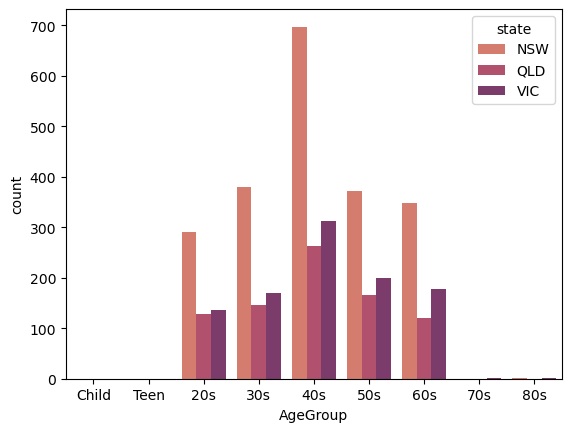

In [54]:
#Visualising distribution across age groups
sns.countplot(x='AgeGroup',data=df, hue='state', palette='flare')

Inference: Most customers are in their 40s

In [55]:
#Saving dataset
df.to_excel('My_cleaned_dataset.xlsx')